# Implementing the Gradient Descent Algorithm

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s=25, color= 'red', edgecolor='k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s=25, color= 'blue', edgecolor='k')

def display(m, b, color='g--'):
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

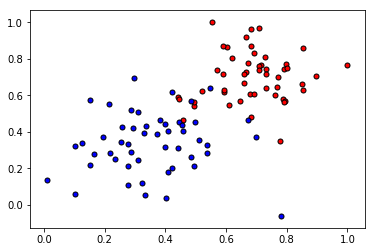

In [11]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0, 1]])
y = np.array(data[2])
plot_points(X, y)
plt.show()

## TODO: Implementing the basic functions

Here is your turn to shine. Implement the following formulas, as explained in the text.

* Sigmoid Activation function
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

* Output (prediction) formula
$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

* Error Function

$$ Error(y, \hat{y}) = - y \log(\hat{y}) - (1 - y)\log(1 - \hat{y}) $$

* Function that updates the weights and bias

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i $$

$$ b \longrightarrow b + \alpha (y - \hat{y}) $$


In [26]:
# Implement the following

# Sigmoid Activation Function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def output_prediction(x, W, b):
    return sigmoid(np.matmul(W, x) + b)

# Error function
def error_formula(y, y_hat):
    a_ = -y*np.log(y_hat)
    b_ = -(1 - y)*np.log(1-y_hat)
    return a_ + b_

def update_weights_and_bias(X, y, weights, bias, alpha=0.01):
    y_pred = output_prediction(weights, X, bias)
    weights = weights + alpha * (y - y_pred) * X
    bias = bias + alpha * (y - y_pred)
    return weights, bias

In [29]:
# Training and plotting the training process
def train(features, targets, epochs=10, alpha=0.01, graph_lines=False):
    errors = [] # Used to plot the error trend over 'n' epochs
    n_records, n_features = features.shape
    last_loss = None
    
    # Initialize Random Weights
    weights = np.random.normal(scale=1/(n_features**0.5), size=n_features)
    bias = 0

    for e in range(epochs):
        for x, y in zip(features, targets):
            y_hat = output_prediction(weights, x, bias)
            error = error_formula(y, y_hat)
            weights, bias = update_weights_and_bias(x, y, weights, bias, alpha)
        
        pred_output = output_prediction(weights, features, bias)
        loss = np.mean(error_formula(targets, pred_output))
        errors.append(error)
        
        if e % (epochs/10) == 0:
            print("\n========== Epoch", e,"==========")
            
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = pred_output > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
            
            if graph_lines:
                display(-weights[0]/weights[1], -bias/weights[1])
    
    # Plotting the solution boundary
    plt.title("Solution Boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')
    
    # Plotting the data
    plot_points(features, targets)
    plt.show()
    
    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel("Number of epochs")
    plt.ylabel("Error")
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.6225835210454962
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.5548744083669508
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872473
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.4593334641861401
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.42525543433469976
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3973461571671399
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.3741469765239074
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35459973368161973
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.3379273658879921
Accuracy:  0.94


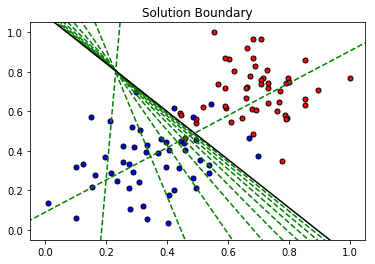

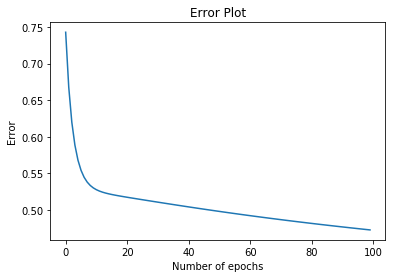

In [34]:
np.random.seed(44)
epochs = 100
learnrate = 0.01

train(X, y, epochs, learnrate, True)